### 1. Problem Statement

Customer Segmentation using K-Means Clustering on E-commerce Data

#### Objective

In the competitive e-commerce industry, businesses strive to understand their customers better in order to tailor their marketing strategies and improve customer satisfaction. A major challenge is that customers exhibit diverse behaviors in terms of spending habits and purchasing power, making it difficult to implement a one-size-fits-all approach.

The mall management is looking to leverage customer demographic and spending data to identify distinct customer groups. This will help them personalize their offerings, optimize marketing budgets, and improve business decisions.

### Data collection

#### Import necessary libraries

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#### Load the dataset

In [43]:
data = pd.read_csv('Mall_Customers.csv')

#### Data Inspection

In [46]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


### 2. Exploratory Data Analysis (EDA)

#### Display dataset info and summary

In [50]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [52]:
print(data.describe(include='all'))

        CustomerID  Gender         Age  Annual Income (k$)  \
count   200.000000     200  200.000000          200.000000   
unique         NaN       2         NaN                 NaN   
top            NaN  Female         NaN                 NaN   
freq           NaN     112         NaN                 NaN   
mean    100.500000     NaN   38.850000           60.560000   
std      57.879185     NaN   13.969007           26.264721   
min       1.000000     NaN   18.000000           15.000000   
25%      50.750000     NaN   28.750000           41.500000   
50%     100.500000     NaN   36.000000           61.500000   
75%     150.250000     NaN   49.000000           78.000000   
max     200.000000     NaN   70.000000          137.000000   

        Spending Score (1-100)  
count               200.000000  
unique                     NaN  
top                        NaN  
freq                       NaN  
mean                 50.200000  
std                  25.823522  
min                   1.

#### Check how many unique values are there in the variables

In [55]:
print(data.nunique())

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64


#### Check if there is any duplicate value in the dataset

In [60]:
print(data.duplicated().sum())

0


#### Check if there is any missing value in the dataset

print(data.isnull().sum())

### 3. Data Preprocessing

#### Encode the categorical variables

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [75]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40


#### Rename columns for convenience

In [138]:
data = data.rename(columns={'Annual Income (k$)' : 'Annual_Income', 'Spending Score (1-100)' : 'Spending Score'})

### 4. Data Visualization

- Univariate Analysis
  - Visualize the distribution of features like Age, Annual Income, and Spending Score:

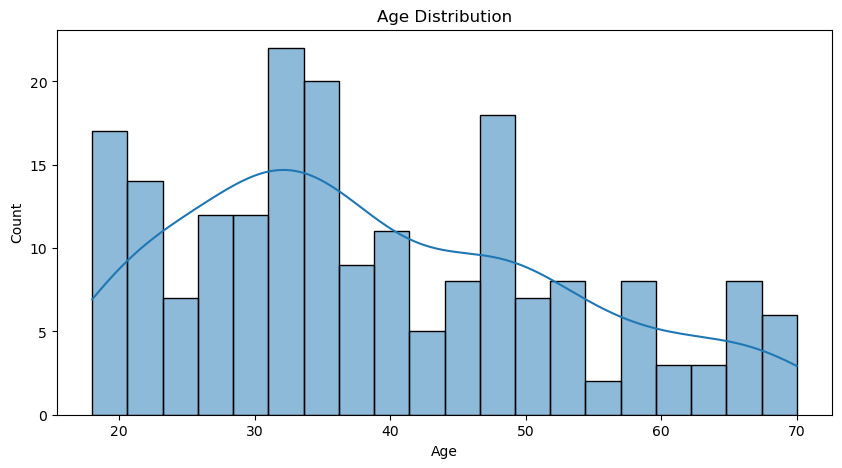

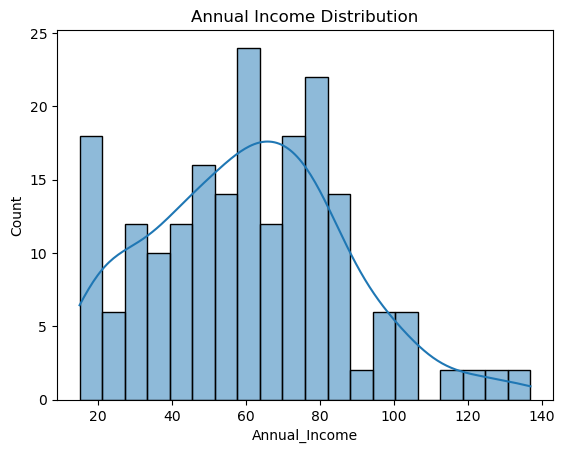

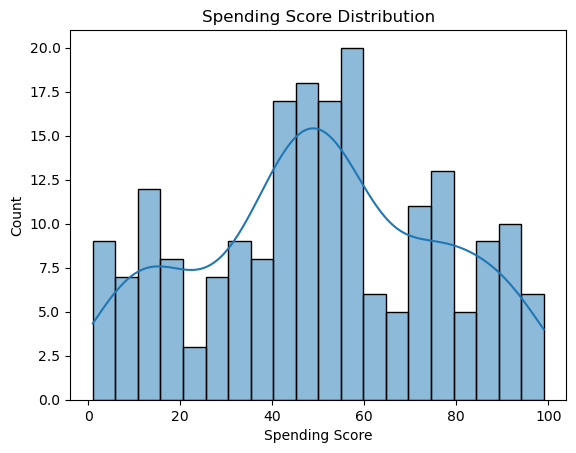

In [148]:
plt.figure(figsize=(10,5))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(data['Annual_Income'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.show()

sns.histplot(data['Spending Score'], bins=20, kde=True)
plt.title('Spending Score Distribution')

plt.show()

- Bivariate Analysis
    - Explore relationships between features:

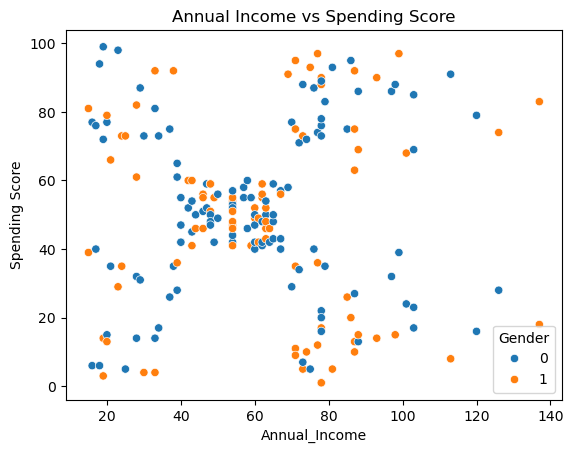

In [157]:
sns.scatterplot(x='Annual_Income', y='Spending Score', data=data, hue='Gender')
plt.title('Annual Income vs Spending Score')
plt.show()

### 5. Determine Optimal Number of Clusters
- Use the Elbow Method to find the optimal number of clusters

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

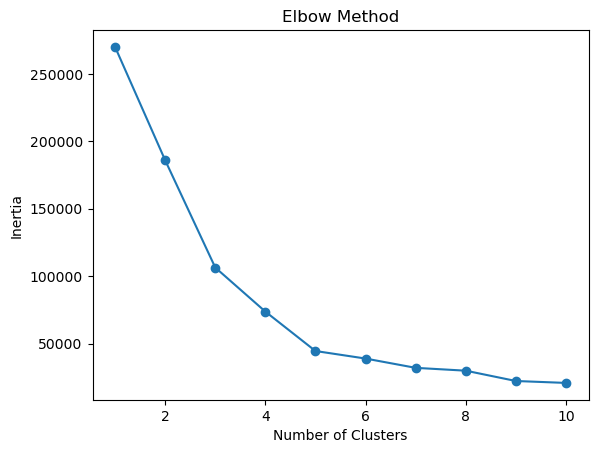

In [169]:
X = data[['Annual_Income', 'Spending Score']]
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

The 'elbow point' in the plot indicates the optimal number of clusters.

### 6. Apply K-Means Clustering

In [177]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [188]:
data['Cluster'] = kmeans.predict(X)

### 7. Visualize the Clusters
- Plot the clusters to observe the segmentation

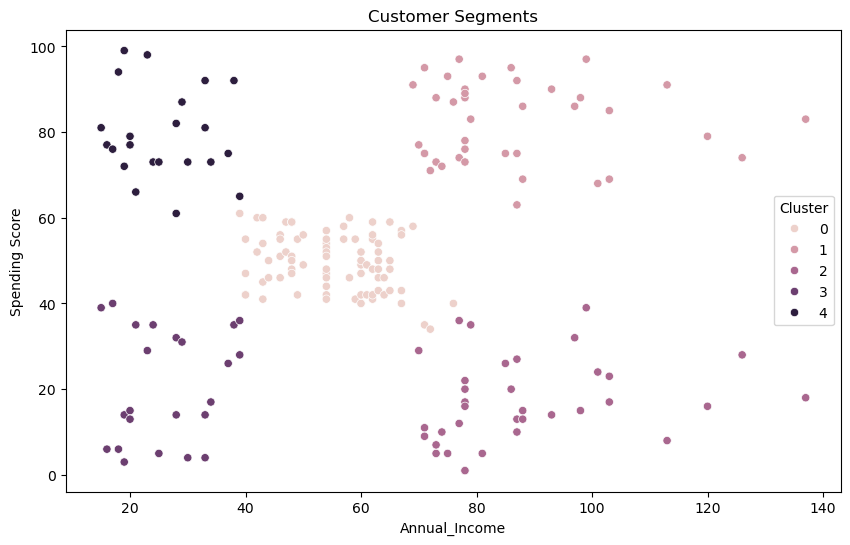

In [190]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual_Income', y='Spending Score', data=data, hue='Cluster')
plt.title('Customer Segments')
plt.show()

In [192]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending Score',
       'clusters', 'Cluster'],
      dtype='object')